# Taxi Vis - Data visualization project 
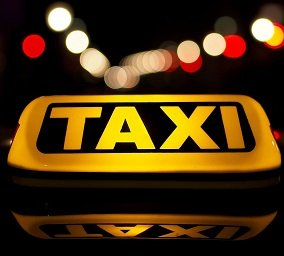

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline  
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 

In [2]:
df = pd.read_csv('Taxi_data.csv')
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pickup_day_number,dropoff_day_number,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,Profit
0,2,2016-01-11 12:05:45,2016-01-11 12:12:34,1,-73.989449,40.741734,-73.996880,40.725307,N,409,...,0,0,12,12,1,1,Afternoon,Afternoon,1.930838,8.324456
1,1,2016-01-14 12:04:38,2016-01-14 12:21:14,1,-73.993034,40.747849,-73.979271,40.749985,N,996,...,3,3,12,12,1,1,Afternoon,Afternoon,1.183499,5.036161
2,1,2016-01-09 20:03:09,2016-01-09 20:10:45,1,-74.005157,40.720306,-73.994019,40.736187,N,456,...,5,5,20,20,1,1,Evening,Evening,1.999803,8.627900
3,1,2016-01-17 00:29:19,2016-01-17 00:31:09,2,-73.985374,40.753082,-73.979370,40.760429,N,110,...,6,6,0,0,1,1,Late night,Late night,0.960832,4.056429
4,2,2016-01-24 23:53:10,2016-01-25 00:13:46,1,-74.014000,40.712551,-73.972519,40.797508,N,1236,...,6,0,23,0,1,1,Late night,Late night,10.072253,44.146681


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56278 entries, 0 to 56277
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vendor_id           56278 non-null  int64  
 1   pickup_datetime     56278 non-null  object 
 2   dropoff_datetime    56278 non-null  object 
 3   passenger_count     56278 non-null  int64  
 4   pickup_longitude    56278 non-null  float64
 5   pickup_latitude     56278 non-null  float64
 6   dropoff_longitude   56278 non-null  float64
 7   dropoff_latitude    56278 non-null  float64
 8   store_and_fwd_flag  56278 non-null  object 
 9   trip_duration       56278 non-null  int64  
 10  pickup_day_name     56278 non-null  object 
 11  dropoff_day_name    56278 non-null  object 
 12  pickup_day_number   56278 non-null  int64  
 13  dropoff_day_number  56278 non-null  int64  
 14  pickup_hour         56278 non-null  int64  
 15  dropoff_hour        56278 non-null  int64  
 16  pick

#### Check the duplicates data and drop them

In [8]:
df.duplicated().sum()

0

In [7]:
df.drop_duplicates(inplace = True)


### Q1: using 2 different kinds of plots, Inspect the distribution of the distance less than 25 km. 

In [9]:
df_smaller_25 = df[df['distance'] < 25]


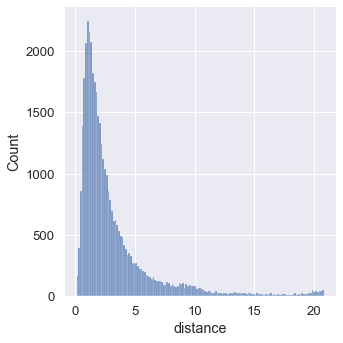

In [10]:
sns.displot(data = df_smaller_25 , x = 'distance')

<AxesSubplot:xlabel='distance', ylabel='Density'>

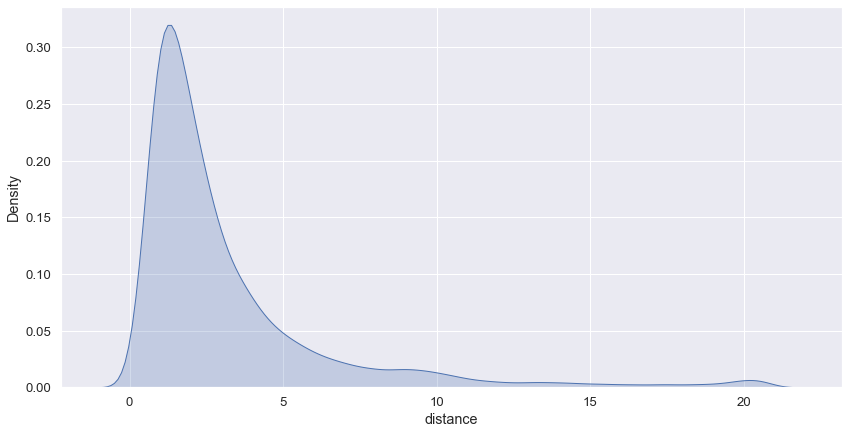

In [12]:
sns.kdeplot(data = df_smaller_25 , x = 'distance' , shade = True)

###  Q2: using bar chart, inspect which time of the day corsponds to the highest Profit.


In [20]:
df.groupby('pickup_timeofday').sum()['Profit'].sort_values(ascending = False)

pickup_timeofday
Evening       184586.134942
Late night    144965.482727
Morning       125363.290533
Afternoon     105975.230615
Name: Profit, dtype: float64

<AxesSubplot:xlabel='pickup_timeofday', ylabel='Profit'>

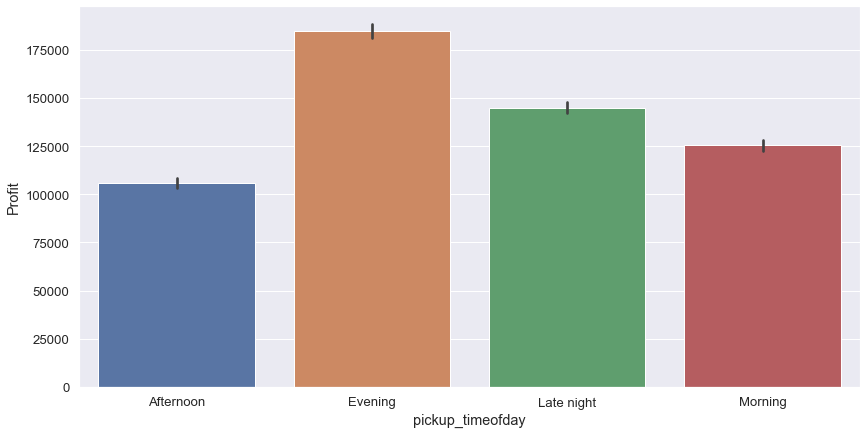

In [14]:
sns.barplot(data = df , x = 'pickup_timeofday' , y = 'Profit' , estimator=sum)

### Q3: which hours crosponds for higher profits.


In [18]:
df.groupby('pickup_hour').sum()['Profit'].sort_values(ascending = False)

pickup_hour
21    33875.068431
20    32965.501833
22    32680.294724
18    32537.992856
19    31408.494537
23    29226.043706
15    28903.562729
17    28267.057302
14    27421.313937
16    25532.019982
13    25098.478936
12    24551.875012
11    23285.764106
10    23222.936765
0     22782.436890
8     22463.425024
9     21870.780100
7     20944.989510
1     17134.479095
2     14220.854757
6     13575.395029
3     11750.140696
4      9250.621293
5      7920.611566
Name: Profit, dtype: float64

<AxesSubplot:xlabel='pickup_hour', ylabel='Profit'>

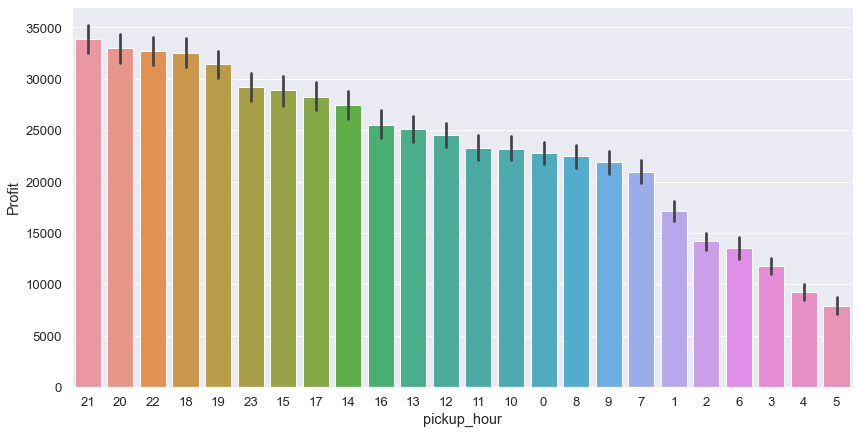

In [23]:
sns.barplot(data = df , x ='pickup_hour' , y = 'Profit' , estimator=sum , order=df.groupby('pickup_hour').sum()['Profit'].sort_values(ascending = False).index)

In [25]:
df.groupby('pickup_hour').sum()['Profit'].sort_values(ascending = False).index

Int64Index([21, 20, 22, 18, 19, 23, 15, 17, 14, 16, 13, 12, 11, 10,  0,  8,  9,
             7,  1,  2,  6,  3,  4,  5],
           dtype='int64', name='pickup_hour')

### Q4: Find the vendor ratio 

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

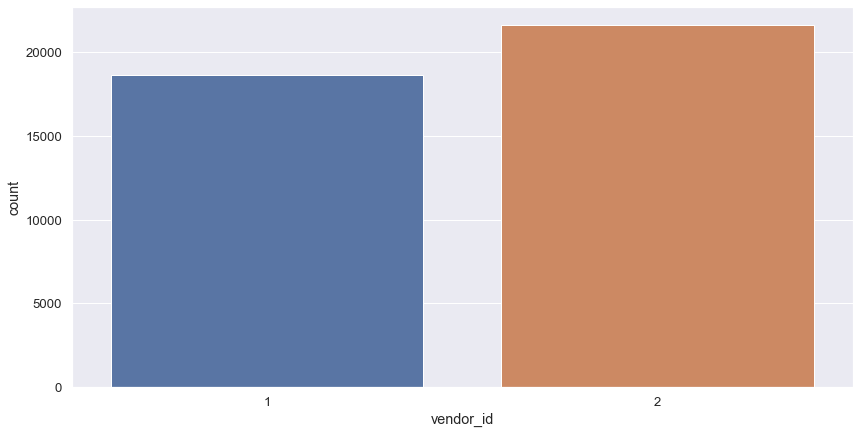

In [26]:
sns.countplot(data = df , x ='vendor_id')

In [27]:
df.groupby('vendor_id').sum()['Profit']

vendor_id
1    257007.670949
2    303882.467868
Name: Profit, dtype: float64

### Q5: which weekday crosponds for higher trips.

<AxesSubplot:xlabel='pickup_day_name', ylabel='count'>

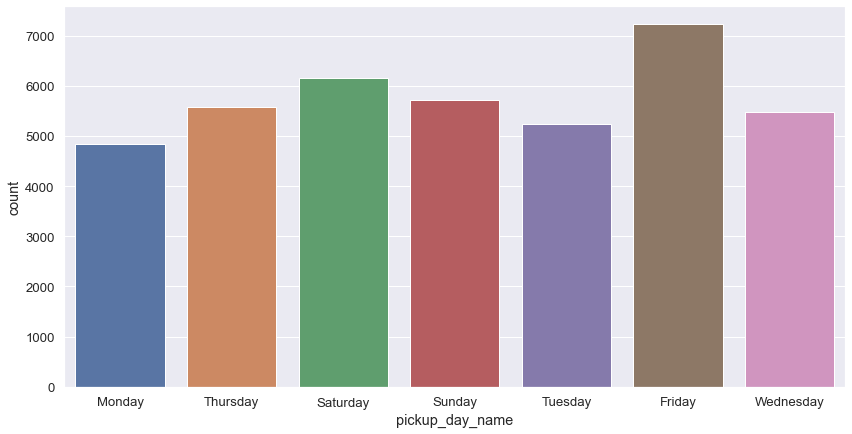

In [29]:
sns.countplot(data  = df , x = 'pickup_day_name')

### Q6: Inspect how many trips per each count of passengers in one ride


In [30]:
df['passenger_count'].value_counts()

1    28637
2     5598
5     2311
3     1577
6     1369
4      737
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

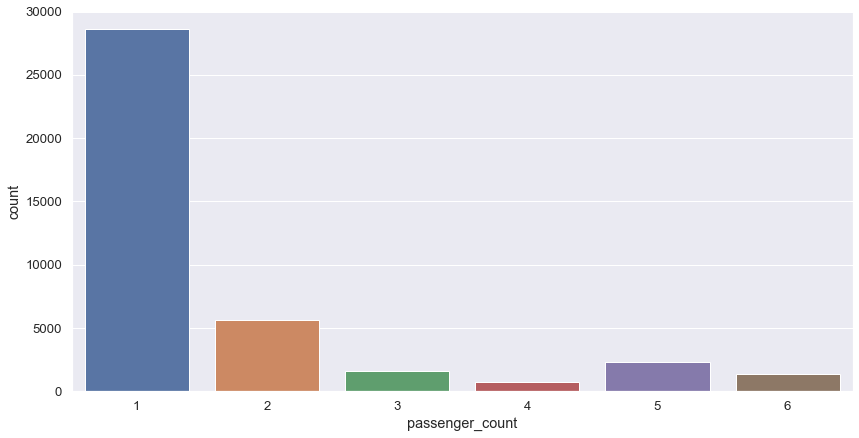

In [31]:
sns.countplot(data = df , x = 'passenger_count')

### Q7: is there any corrleation between distance of the trip and profit


In [32]:
df[['Profit','distance']].corr()

,Profit,distance
Profit,1.0,1.0
distance,1.0,1.0


<AxesSubplot:xlabel='Profit', ylabel='distance'>

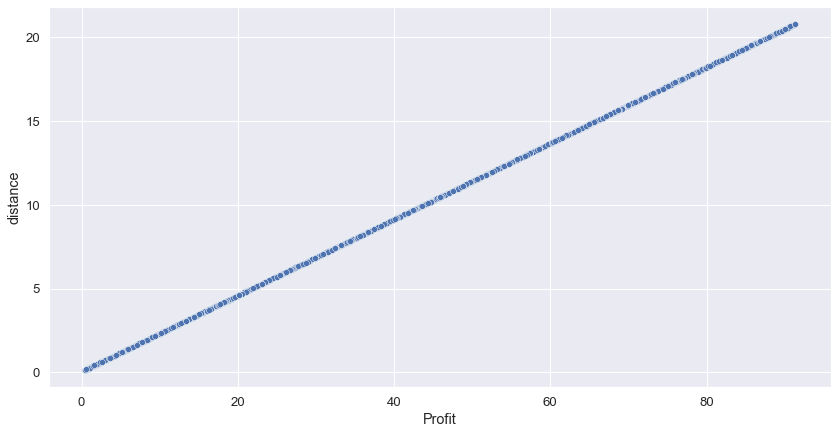

In [33]:
sns.scatterplot(data = df , x = 'Profit' , y ='distance')

### Q8: is there any outliers in trip duration


In [38]:
Q1 = df['trip_duration'].quantile(0.25)

In [39]:
Q3 = df['trip_duration'].quantile(0.75)

In [40]:
IQR = Q3 - Q1

In [41]:
Max_whisker = Q3 + ( 1.5 * IQR )

In [42]:
Min_Whisker  = Q1 - (1.5 * IQR)

In [43]:
df[ (df['trip_duration'] > Max_whisker)  | (df['trip_duration'] < Min_Whisker)   ]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pickup_day_number,dropoff_day_number,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,Profit
11,1,2016-01-25 10:16:44,2016-01-25 11:07:39,2,-73.984917,40.763615,-74.072746,40.664791,Y,3055,...,0,0,10,11,1,1,Morning,Morning,13.249480,58.126479
32,1,2016-01-01 15:22:46,2016-01-01 16:03:50,1,-73.988945,40.748455,-73.934357,40.679531,N,2464,...,4,4,15,16,1,1,Afternoon,Evening,8.938959,39.160186
51,2,2016-01-14 15:02:20,2016-01-14 15:36:03,1,-73.988892,40.757778,-73.873077,40.774349,N,2023,...,3,3,15,15,1,1,Afternoon,Afternoon,9.926068,43.503465
56,2,2016-01-04 06:24:45,2016-01-04 07:17:35,5,-73.790047,40.646969,-73.977699,40.725529,N,3170,...,0,0,6,7,1,1,Morning,Morning,18.073758,79.353302
68,1,2016-01-25 21:55:01,2016-01-25 22:29:00,1,-73.997231,40.722355,-73.865509,40.690887,N,2039,...,0,0,21,22,1,1,Evening,Late night,11.641414,51.050990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56079,2,2016-01-01 04:56:51,2016-01-01 05:37:35,1,-73.987366,40.760021,-73.903343,40.677902,N,2444,...,4,4,4,5,1,1,Late night,Late night,11.555171,50.671519
56109,1,2016-01-26 18:37:51,2016-01-26 19:11:13,2,-73.874519,40.774063,-73.978455,40.777351,N,2002,...,1,1,18,19,1,1,Evening,Evening,8.759494,38.370539
56127,2,2016-01-08 06:37:25,2016-01-08 07:44:24,1,-73.780663,40.646343,-73.982475,40.727467,N,4019,...,4,4,6,7,1,1,Morning,Morning,19.259405,84.570149
56156,2,2016-01-02 14:46:09,2016-01-02 15:25:12,1,-74.015984,40.704762,-73.959579,40.577389,N,2343,...,5,5,14,15,1,1,Afternoon,Afternoon,14.941420,65.571015


<AxesSubplot:xlabel='trip_duration'>

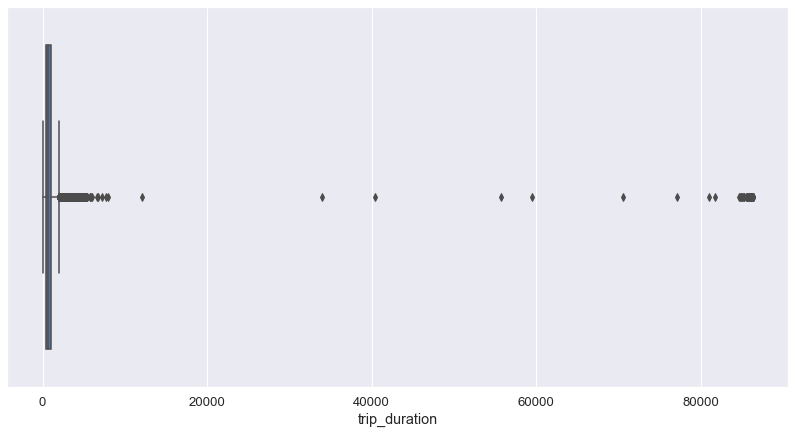

In [44]:
sns.boxplot(data = df , x ='trip_duration')

### Q9: Create a boxplot reflecting each time zone with distance features and comment your interpretation.


<AxesSubplot:xlabel='pickup_timeofday', ylabel='distance'>

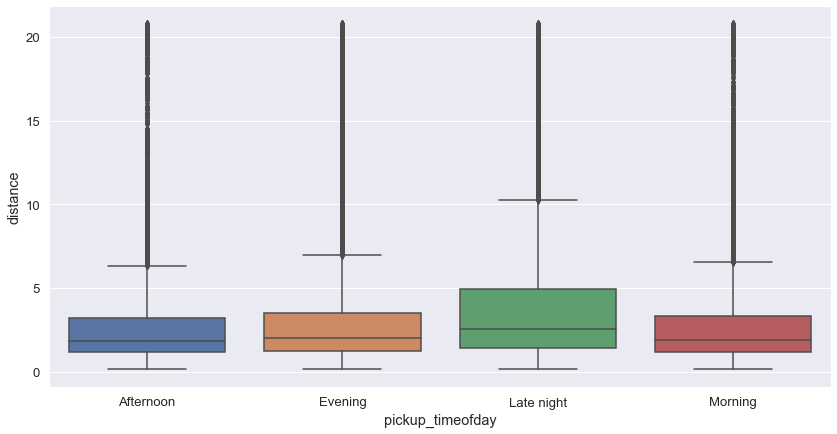

In [45]:
sns.boxplot( data = df , x = 'pickup_timeofday' , y= 'distance')

### Q10: find the average profit of each timezone each day with heatmap

In [46]:
pd.pivot_table(data = df , index ='pickup_timeofday' , columns ='pickup_day_name' , values = 'Profit')

pickup_day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
pickup_timeofday,,,,,,,
Afternoon,13.502797,13.595193,11.644655,13.706298,13.259186,12.201109,12.680595
Evening,13.515177,13.070921,12.155331,14.511326,13.385399,14.456827,13.431973
Late night,17.031819,18.566555,15.304485,16.775366,17.369968,17.503200,16.416891
Morning,13.251635,13.846907,13.715599,13.991751,11.991751,12.209682,12.137220


<AxesSubplot:xlabel='pickup_day_name', ylabel='pickup_timeofday'>

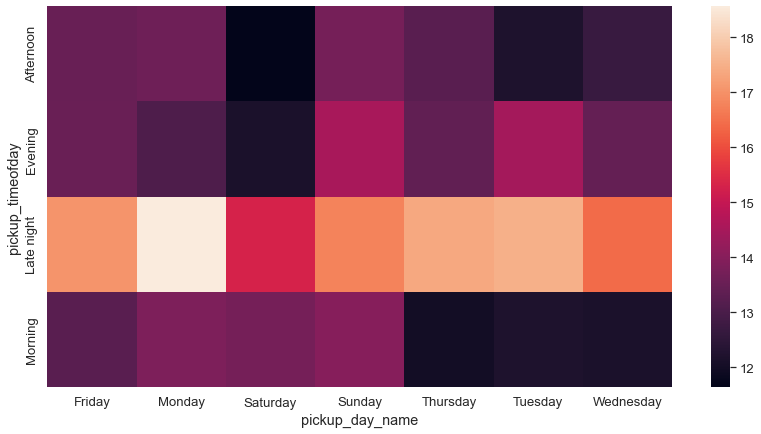

In [47]:
x =pd.pivot_table(data = df , index ='pickup_timeofday' , columns ='pickup_day_name' , values = 'Profit')
sns.heatmap(x)

<AxesSubplot:xlabel='pickup_day_name', ylabel='Profit'>

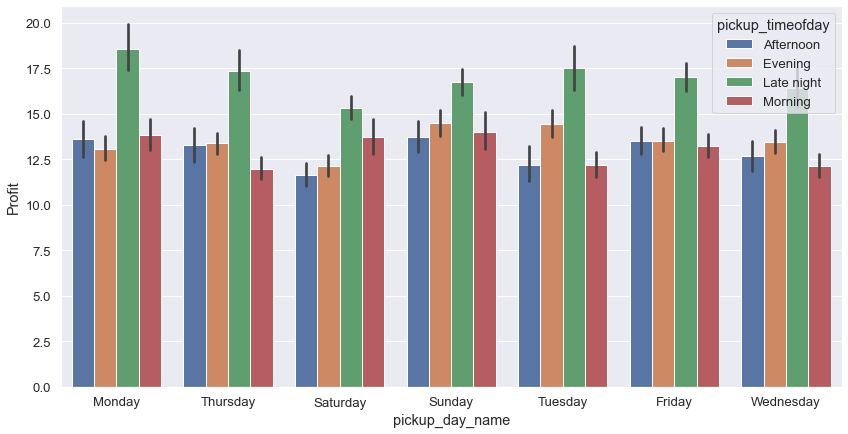

In [49]:
sns.barplot(data  = df , x = 'pickup_day_name' , y = 'Profit' , hue = 'pickup_timeofday')

#### what is the best passenger count for profit ?

In [50]:
df.groupby('passenger_count').sum()['Profit']

passenger_count
1    394410.944621
2     82751.521899
3     21849.939786
4     10498.648017
5     32624.185564
6     18754.898930
Name: Profit, dtype: float64

<AxesSubplot:xlabel='passenger_count', ylabel='Profit'>

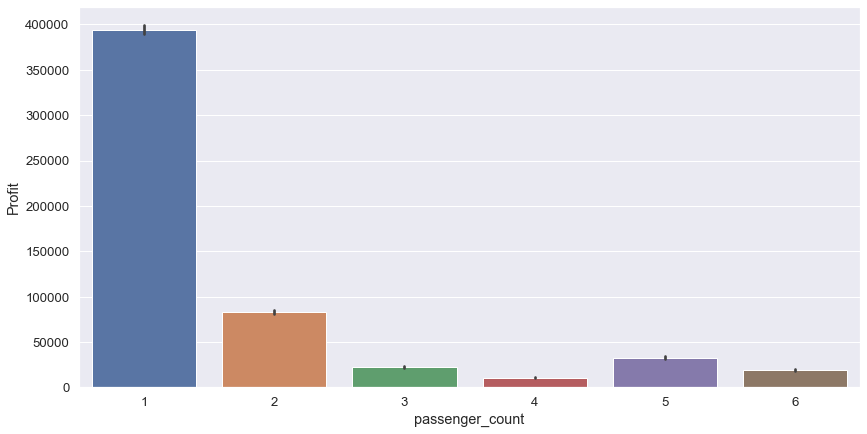

In [51]:
sns.barplot(data = df , x ='passenger_count' , y ='Profit' , estimator=sum)

# <center> Thanks 🥳